<h1>Author: Iptihal Yousri Ibrahim</h1>
<h3>The Sparks Foundation Tas_2 : Prediction using Unsupervised ML</h3>
<h4>Prediction The optimum numper of Clusters and represent it visually</h4>

<h3>Loading Packages and Data</h3>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<h3>Dataset Statistical Information Display</h3>

In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Shape of the data**

In [4]:
df.shape

(150, 4)

**Check Null Values**

In [5]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

**Check Duplications**

In [6]:
df.duplicated().any()

True

In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().any()

False

<h3>Visualizations</h3>

**Univariate Analysis**

>Check outliers

<AxesSubplot:xlabel='sepal length (cm)'>

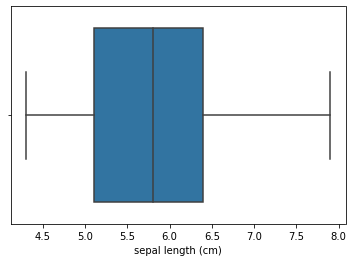

In [9]:
sns.boxplot(df['sepal length (cm)'])

<AxesSubplot:xlabel='sepal width (cm)'>

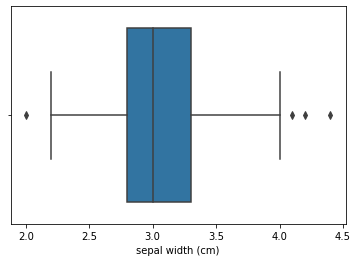

In [10]:
sns.boxplot(df['sepal width (cm)'])

<AxesSubplot:xlabel='petal length (cm)'>

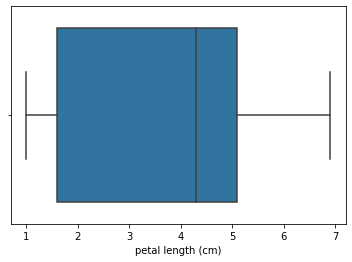

In [11]:
sns.boxplot(df['petal length (cm)'])

<AxesSubplot:xlabel='petal width (cm)'>

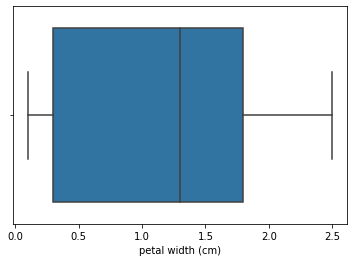

In [12]:
sns.boxplot(df['petal width (cm)'])

>Check distripution

<AxesSubplot:xlabel='petal width (cm)', ylabel='Density'>

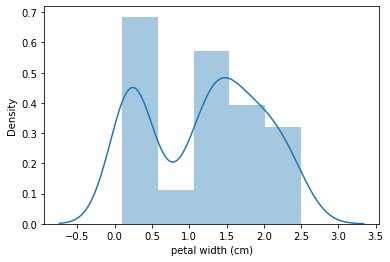

In [13]:
sns.distplot(df['petal width (cm)'])

<AxesSubplot:xlabel='petal length (cm)', ylabel='Density'>

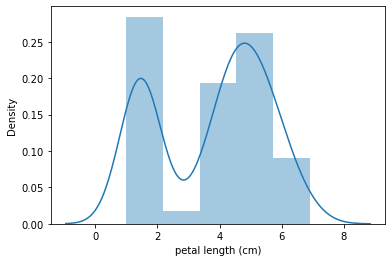

In [14]:
sns.distplot(df['petal length (cm)'])

<AxesSubplot:xlabel='sepal length (cm)', ylabel='Density'>

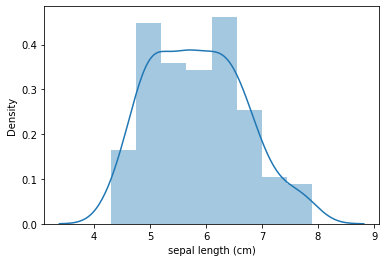

In [15]:
sns.distplot(df['sepal length (cm)'])

<AxesSubplot:xlabel='sepal width (cm)', ylabel='Density'>

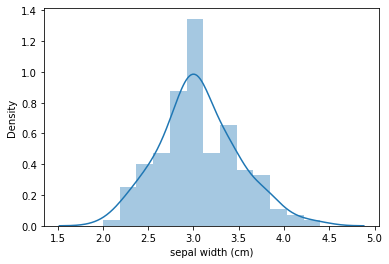

In [16]:
sns.distplot(df['sepal width (cm)'])

**Bivariate Analysis**

>plot correlation

<AxesSubplot:>

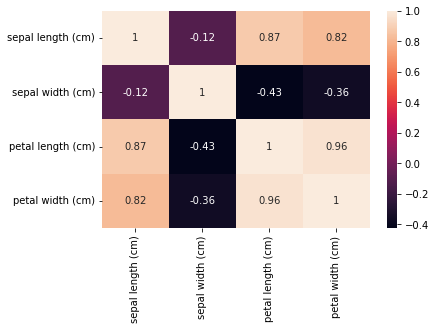

In [17]:
sns.heatmap(df.corr(), annot=True)

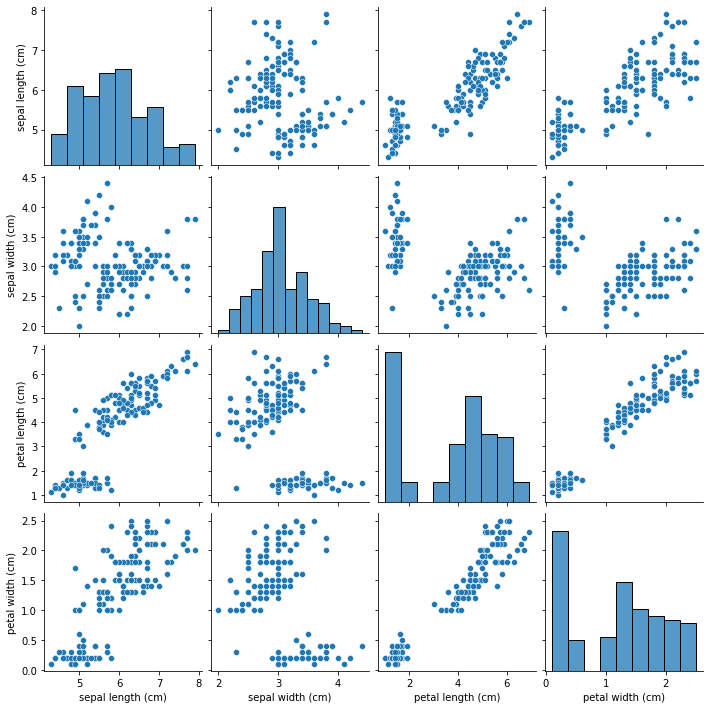

In [18]:
sns.pairplot(df)

<h3>Find the optimum number of clusters</h3>

**Elbow Method**

In [23]:
x = df.iloc[:, [0, 1, 2, 3]].values
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit_predict(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

From the figure apove we choose the number of clusters to be 3

<h3>Representing Clusters Visually</h3>

In [21]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

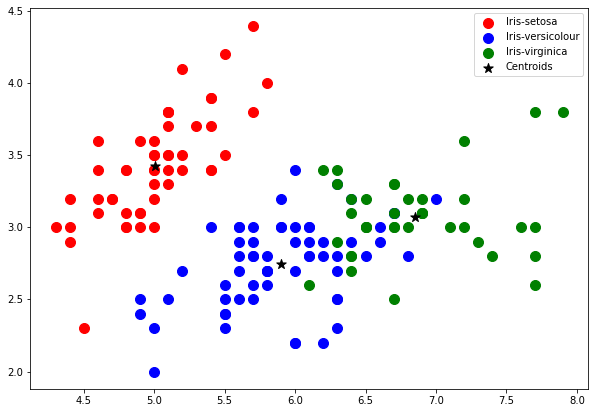

In [22]:
plt.figure(figsize=(10,7))

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', marker ='*', label = 'Centroids')

plt.legend()